# 0) Setting Environment

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

# 1) Reading Dataset

In [5]:
# URL of the raw CSV file from Github Repo
csv_url = 'https://raw.githubusercontent.com/Shri-2000v/SpaceShip-Titanic-Modeling/main/data/train.csv'

# Reading the CSV file
df = pd.read_csv(csv_url)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
# Checking Info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [383]:
# Checking Statistical Properties of Numerical features
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
# Checking Statistical Properties of Categorical features
df.describe(include="O")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


# 2) Data Analysis

## 2.1) Univariate Analysis

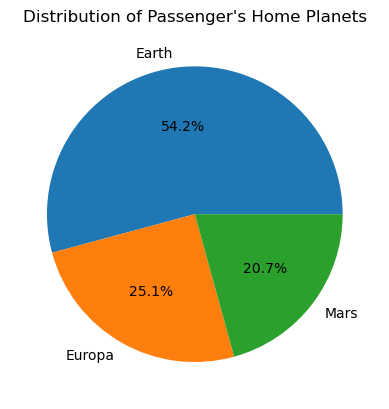

In [14]:
# Calculating Frequency
planet_counts = df['HomePlanet'].value_counts()

# Plotting HomePlanets
planet_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title("Distribution of Passenger's Home Planets")
plt.ylabel("")
plt.show()

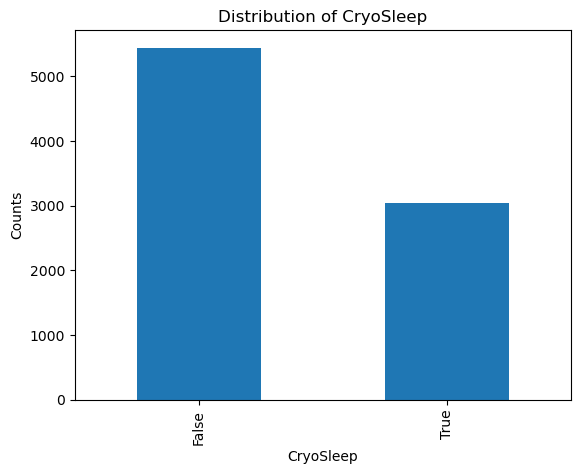

In [10]:
# Calculating Frequency
csleep_counts = df['CryoSleep'].value_counts()

# Plotting CRYOSLEEP frequency
csleep_counts.plot(kind='bar')
plt.xlabel('CryoSleep')
plt.ylabel('Counts')
plt.title('Distribution of CryoSleep')
plt.show()

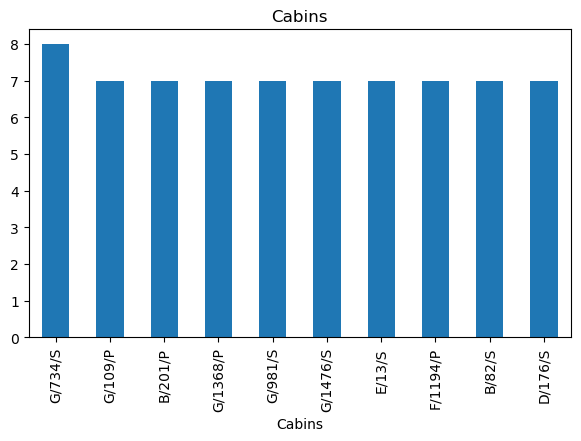

In [12]:
# Plotting first 10 Top cabins
cabin_counts = df['Cabin'].value_counts()[:10]
cabin_counts.plot(kind='bar', figsize=(7, 4))
plt.xlabel('Cabins')
plt.title('Cabins')
plt.show()

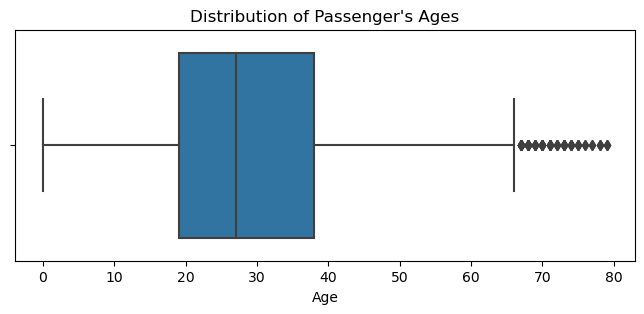

In [21]:
# plotting Age of passengers
plt.figure(figsize=(8, 3))
sns.boxplot(df.Age)
plt.xlabel('Age')
plt.title("Distribution of Passenger's Ages")
plt.show()

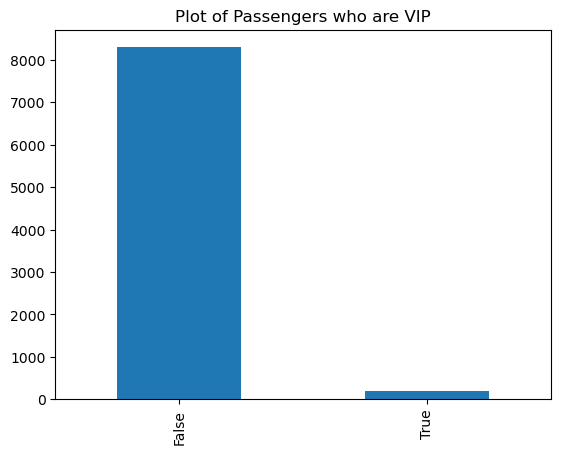

In [23]:
# Calculating Frequency
vip_counts = df['VIP'].value_counts()

# Plotting VIP Distribution
vip_counts.plot(kind='bar')
plt.title('Plot of Passengers who are VIP')
plt.ylabel('')
plt.show()

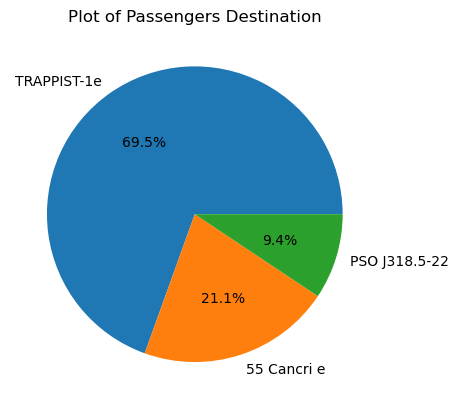

In [24]:
# Calculating Frequency
des_counts = df['Destination'].value_counts()

# Plotting Destination destribution
des_counts.plot(kind='pie',autopct='%1.1f%%')
plt.plot(des_counts)
plt.title('Plot of Passengers Destination')
plt.ylabel("")
plt.show()

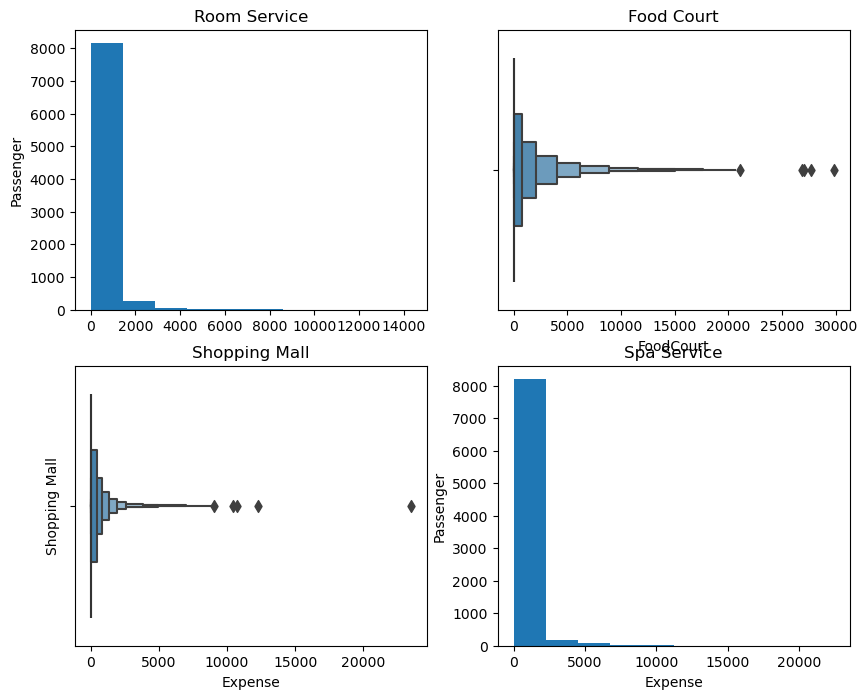

In [42]:
# Plotting Histogrms
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
df.RoomService.plot(kind="hist")
plt.title("Room Service")
plt.ylabel('Passenger')

plt.subplot(2,2,2)
sns.boxenplot(df.FoodCourt)
plt.title("Food Court")

plt.subplot(2,2,3)
sns.boxenplot(df.ShoppingMall)
plt.title("Shopping Mall")
plt.xlabel("Expense")
plt.ylabel("Shopping Mall")

plt.subplot(2,2,4)
df.Spa.plot(kind="hist")
plt.title("Spa Service")
plt.xlabel('Expense')
plt.ylabel('Passenger')
plt.show()

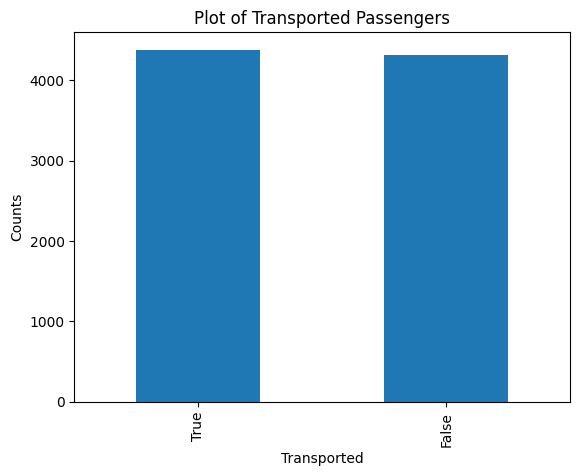

In [396]:
# Calculating Frequency
csleep_counts = df['Transported'].value_counts()

# Plotting Transported frequency
csleep_counts.plot(kind='bar')
plt.xlabel('Transported')
plt.ylabel('Counts')
plt.title('Plot of Transported Passengers')
plt.show()